In [2]:
import pandas as pd
tiles_df = pd.read_parquet('distinct_LONLAT.parquet', engine='pyarrow')
tiles_df


,XLON,XLAT,LONLAT_ID
0,-0.433273,51.626116,1
1,0.668106,51.672981,2
2,-0.473099,51.742762,3
3,-0.081711,51.580910,4
4,-0.493698,51.927754,5
...,...,...,...
892704,0.471725,51.508315,892705
892705,-0.173721,52.016585,892706
892706,0.611801,51.748714,892707
892707,0.365982,51.844687,892708


In [3]:
movement_df = pd.read_parquet('pre_processed_movement.parquet', engine='pyarrow')
movement_df

,AGG_DAY_PERIOD,LONLAT_ID,mean_column
0,2020-01-01,3,0.339944
1,2020-01-01,6,0.130376
2,2020-01-01,7,0.381778
3,2020-01-01,11,0.119285
4,2020-01-01,15,0.373764
...,...,...,...
61624146,2020-12-31,886042,0.155193
61624147,2020-12-31,886043,0.037002
61624148,2020-12-31,886044,0.112204
61624149,2020-12-31,886045,0.113549


<Axes: xlabel='XLON', ylabel='XLAT'>

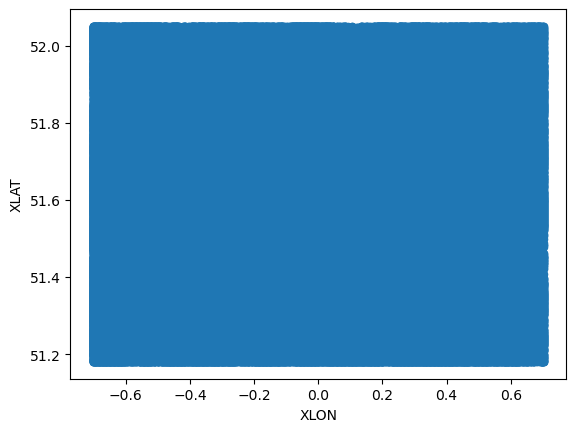

In [4]:
tiles_df.plot(x="XLON", y="XLAT", kind="scatter")

In [5]:
tiles_df.to_csv("tiles.csv")

In [5]:
movement_df_03_23 = movement_df[(movement_df.AGG_DAY_PERIOD =="2020-03-23")]
movement_df_03_23

,AGG_DAY_PERIOD,LONLAT_ID,mean_column
13104021,2020-03-23,1,0.359773
13104022,2020-03-23,3,0.041320
13104023,2020-03-23,4,0.129252
13104024,2020-03-23,7,0.216764
13104025,2020-03-23,9,0.234539
...,...,...,...
13243782,2020-03-23,884398,0.137566
13243783,2020-03-23,884399,0.374480
13243784,2020-03-23,884400,0.083363
13243785,2020-03-23,884401,0.114845


In [6]:
movement_df_03_23_tiles = pd.merge(movement_df_01_01, tiles_df, on="LONLAT_ID")
movement_df_03_23_tiles

,AGG_DAY_PERIOD,LONLAT_ID,mean_column,XLON,XLAT
0,2020-03-23,1,0.359773,-0.433273,51.626116
1,2020-03-23,3,0.041320,-0.473099,51.742762
2,2020-03-23,4,0.129252,-0.081711,51.580910
3,2020-03-23,7,0.216764,-0.041885,51.480100
4,2020-03-23,9,0.234539,-0.445633,51.741061
...,...,...,...,...,...
139761,2020-03-23,884398,0.137566,-0.702438,51.474113
139762,2020-03-23,884399,0.374480,0.673599,51.373066
139763,2020-03-23,884400,0.083363,0.445633,51.894715
139764,2020-03-23,884401,0.114845,0.264359,51.351629


<Axes: xlabel='XLON', ylabel='XLAT'>

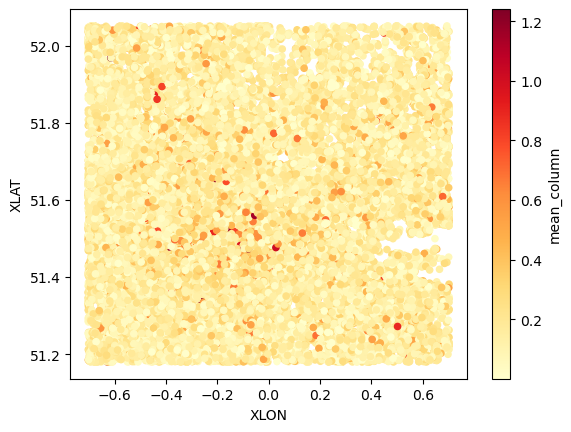

In [7]:
movement_df_03_23_tiles.plot(x="XLON", y="XLAT", kind="scatter",c="mean_column",
        colormap="YlOrRd" )

In [8]:
import osmnx as ox
import geopandas as gpd
from ipyleaflet import Map, Marker, GeoData, basemaps, LayersControl, Popup, Heatmap, Choropleth
from ipywidgets import HTML
import pandas as pd

# Specify the area of interest
place_name = "City of London, England, UK"

# Get place boundary related to the place name as a geodataframe
area = ox.geocode_to_gdf(place_name)

# Specify the area of interest
westminster = "Westminster, England, UK"

# Get place boundary related to the place name as a geodataframe
westminster = ox.geocode_to_gdf(westminster)
westminster

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,class,type,place_rank,importance,addresstype,name,display_name
0,"POLYGON ((-0.21609 51.52895, -0.21609 51.52887...",51.539812,51.483806,-0.111083,-0.216091,259949226,relation,51781,51.497321,-0.137149,boundary,administrative,16,0.601388,city,City of Westminster,"City of Westminster, Greater London, England, ..."


In [9]:

movement_df = gpd.GeoDataFrame(
    movement_df_03_23_tiles, geometry=gpd.points_from_xy(movement_df_03_23_tiles.XLON, movement_df_03_23_tiles.XLAT), crs="EPSG:4326"
)

geom = area.loc[area['place_rank'] == 12, 'geometry'].iloc[0]
movement_city_area = movement_df.intersects(geom)
movement_city_merge = movement_df.merge(movement_city_area.to_frame(), left_index=True, right_index=True)
movement_city = movement_city_merge.loc[movement_city_merge[0] == True]
movement_city

,AGG_DAY_PERIOD,LONLAT_ID,mean_column,XLON,XLAT,geometry,0
650,2020-03-23,1654,0.139623,-0.105057,51.516007,POINT (-0.10506 51.51601),True
701,2020-03-23,1774,0.084449,-0.107803,51.513443,POINT (-0.10780 51.51344),True
905,2020-03-23,2255,0.079956,-0.107803,51.516007,POINT (-0.10780 51.51601),True
1342,2020-03-23,3315,0.583070,-0.092697,51.518571,POINT (-0.09270 51.51857),True
1347,2020-03-23,3328,1.177156,-0.105057,51.510879,POINT (-0.10506 51.51088),True
...,...,...,...,...,...,...,...
119193,2020-03-23,349738,0.008870,-0.095444,51.517716,POINT (-0.09544 51.51772),True
119807,2020-03-23,353229,0.024090,-0.084457,51.519425,POINT (-0.08446 51.51943),True
120940,2020-03-23,359794,0.217543,-0.099564,51.510879,POINT (-0.09956 51.51088),True
121741,2020-03-23,364522,0.585920,-0.083084,51.516007,POINT (-0.08308 51.51601),True


In [10]:
geom_west = westminster.loc[westminster['place_rank'] == 16, 'geometry'].iloc[0]
movement_west = movement_df.intersects(geom_west)
movement_west_merge = movement_df.merge(movement_west.to_frame(), left_index=True, right_index=True)
movement_west = movement_west_merge.loc[movement_west_merge[0] == True]
movement_west

,AGG_DAY_PERIOD,LONLAT_ID,mean_column,XLON,XLAT,geometry,0
71,2020-03-23,206,0.160360,-0.169601,51.532241,POINT (-0.16960 51.53224),True
90,2020-03-23,253,0.211758,-0.195694,51.524552,POINT (-0.19569 51.52455),True
119,2020-03-23,310,0.544590,-0.155869,51.512589,POINT (-0.15587 51.51259),True
146,2020-03-23,377,0.019790,-0.140762,51.516007,POINT (-0.14076 51.51601),True
168,2020-03-23,416,0.053281,-0.176468,51.537367,POINT (-0.17647 51.53737),True
...,...,...,...,...,...,...,...
129204,2020-03-23,428157,0.180692,-0.181961,51.533096,POINT (-0.18196 51.53310),True
129372,2020-03-23,430086,0.120892,-0.168228,51.537367,POINT (-0.16823 51.53737),True
130759,2020-03-23,447204,0.100078,-0.146255,51.501477,POINT (-0.14626 51.50148),True
133453,2020-03-23,489248,0.134527,-0.131149,51.503186,POINT (-0.13115 51.50319),True


In [11]:
center = (51.51788, -0.07902)
map = Map(center=center, zoom=12)


geo_data_area = GeoData(geo_dataframe = area,
                   style={'color': 'black', 'fillColor': 'blue', 'opacity':1, 'weight':1.9, 'dashArray':'2', 'fillOpacity':0},
                   hover_style={'fillColor': 'red' , 'fillOpacity': 0.2},
                   name = 'London City')
map.add(geo_data_area)

geo_data_west = GeoData(geo_dataframe = westminster,
                   style={'color': 'black', 'fillColor': 'blue', 'opacity':1, 'weight':1.9, 'dashArray':'2', 'fillOpacity':0},
                   hover_style={'fillColor': 'red' , 'fillOpacity': 0.2},
                   name = 'Westminster')
map.add(geo_data_west)

geo_data_mov = GeoData(geo_dataframe = movement_city,
                   style={'color': 'black', 'fillColor': '#3366cc', 'opacity':0.05, 'weight':1.9, 'dashArray':'2', 'fillOpacity':0.6},
                   hover_style={'fillColor': 'red' , 'fillOpacity': 0.2},
                   name = 'Movement')

map.add(geo_data_mov)

geo_data_mov_west = GeoData(geo_dataframe = movement_west,
                   style={'color': 'black', 'fillColor': '#3366cc', 'opacity':0.05, 'weight':1.9, 'dashArray':'2', 'fillOpacity':0.6},
                   hover_style={'fillColor': 'red' , 'fillOpacity': 0.2},
                   name = 'Movement West')

map.add(geo_data_mov_west)

Map(center=[51.51788, -0.07902], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', '…

In [12]:
movement_city_west = pd.concat([movement_city, movement_west])
movement_city_west_df = gpd.GeoDataFrame(movement_city_west)
movement_city_west_df

,AGG_DAY_PERIOD,LONLAT_ID,mean_column,XLON,XLAT,geometry,0
650,2020-03-23,1654,0.139623,-0.105057,51.516007,POINT (-0.10506 51.51601),True
701,2020-03-23,1774,0.084449,-0.107803,51.513443,POINT (-0.10780 51.51344),True
905,2020-03-23,2255,0.079956,-0.107803,51.516007,POINT (-0.10780 51.51601),True
1342,2020-03-23,3315,0.583070,-0.092697,51.518571,POINT (-0.09270 51.51857),True
1347,2020-03-23,3328,1.177156,-0.105057,51.510879,POINT (-0.10506 51.51088),True
...,...,...,...,...,...,...,...
129204,2020-03-23,428157,0.180692,-0.181961,51.533096,POINT (-0.18196 51.53310),True
129372,2020-03-23,430086,0.120892,-0.168228,51.537367,POINT (-0.16823 51.53737),True
130759,2020-03-23,447204,0.100078,-0.146255,51.501477,POINT (-0.14626 51.50148),True
133453,2020-03-23,489248,0.134527,-0.131149,51.503186,POINT (-0.13115 51.50319),True


In [13]:
import geopandas as gpd
from shapely.geometry import Polygon
import numpy as np
#points = gpd.read_file('points.shp')

xmin, ymin, xmax, ymax = movement_city_west.total_bounds
print(movement_city_west.total_bounds)

length = 100
wide = 100

cols = list(np.arange(xmin, xmax + wide, wide))
rows = list(np.arange(ymin, ymax + length, length))

polygons = []
for x in cols[:-1]:
    for y in rows[:-1]:
        polygons.append(Polygon([(x,y), (x+wide, y), (x+wide, y+length), (x, y+length)]))

grid = gpd.GeoDataFrame({'geometry':polygons})
grid.to_file("grid.shp")

center = (51.51788, -0.07902)
map = Map(center=center, zoom=12)
map.add(grid)
map.add(Marker(location=(51.48437615, -0.21492004)))
map.add(Marker(location=(51.53907526, -0.07347107)))
cols

[-0.21492004 51.48437615 -0.07347107 51.53907526]


[-0.2149200439, 99.7850799561]

In [14]:
def create_hex_grid(gdf=None, bounds=None, n_cells=10, overlap=False, crs="EPSG:29902"):
    """Hexagonal grid over geometry.
    See https://sabrinadchan.github.io/data-blog/building-a-hexagonal-cartogram.html
    """

    from shapely.geometry import Polygon
    import geopandas as gpd
    if bounds != None:
        xmin, ymin, xmax, ymax= bounds
    else:
        xmin, ymin, xmax, ymax= gdf.total_bounds

    unit = (xmax-xmin)/n_cells
    a = np.sin(np.pi / 3)
    cols = np.arange(np.floor(xmin), np.ceil(xmax), 3 * unit)
    rows = np.arange(np.floor(ymin) / a, np.ceil(ymax) / a, unit)

    #print (len(cols))
    hexagons = []
    for x in cols:
      for i, y in enumerate(rows):
        if (i % 2 == 0):
          x0 = x
        else:
          x0 = x + 1.5 * unit

        hexagons.append(Polygon([
          (x0, y * a),
          (x0 + unit, y * a),
          (x0 + (1.5 * unit), (y + unit) * a),
          (x0 + unit, (y + (2 * unit)) * a),
          (x0, (y + (2 * unit)) * a),
          (x0 - (0.5 * unit), (y + unit) * a),
        ]))

    grid = gpd.GeoDataFrame({'geometry': hexagons},crs=crs)
    grid["grid_area"] = grid.area
    grid = grid.reset_index().rename(columns={"index": "grid_id"})
    if overlap == True:
        cols = ['grid_id','geometry','grid_area']
        grid = grid.sjoin(gdf, how='inner').drop_duplicates('geometry')
    return grid

import pylab as plt
movement_city_west = movement_city_west.to_crs("EPSG:29902")
hexgr = create_hex_grid(movement_city_west, n_cells=100, overlap=True, crs="EPSG:29902")
# hexgr.plot(fc="none", ec='black')
center = ( 51.51788, -0.07902 )
map = Map(center=center, zoom=12)
map.add(geo_data_area)
map.add(geo_data_west)
hexgr = hexgr.to_crs("EPSG:4326")
geo_data_hex_grid = GeoData(geo_dataframe = hexgr,
                   style={'color': 'black', 'fillColor': '#3366cc', 'opacity':0.05, 'weight':1.9, 'dashArray':'2', 'fillOpacity':0.6},
                   hover_style={'fillColor': 'red' , 'fillOpacity': 0.2},
                   name = 'Grid')
map.add(geo_data_hex_grid)
map.add(geo_data_mov)
display(map)

Map(center=[51.51788, -0.07902], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', '…

In [15]:
geo_data_hex_grid_mov = geo_data_hex_grid
means_d = []
means = []
for index, row in hexgr.iterrows():
    points_in_hex = []
    for ix, r in movement_city_west_df.iterrows():
        if row.geometry.contains(r.geometry) == True:
            #print(ix)
            points_in_hex.append(movement_city_west_df.loc[ix]["mean_column"])
            #print(mean)
    mean = np.mean(points_in_hex)
    means_d.append({"index": index,
                  "mean": mean})
    means.append(mean)
    
    #print(points_in_hex) 


In [16]:
means_s = pd.Series(means)
i = 0
for index, row in hexgr.iterrows():
    hexgr.at[index, 'mean'] = means[i]
    i = i+1
hexgr

,grid_id,geometry,grid_area,index_right,AGG_DAY_PERIOD,LONLAT_ID,mean_column,XLON,XLAT,0,mean
47,47,"POLYGON ((-0.21365 51.52617, -0.21222 51.52608...",26203.836283,68906,2020-03-23,172320,0.352038,-0.213547,51.527115,True,0.352038
48,48,"POLYGON ((-0.21567 51.52709, -0.21424 51.52699...",26203.836283,38025,2020-03-23,89927,0.454119,-0.214920,51.527115,True,0.454119
49,49,"POLYGON ((-0.21339 51.52772, -0.21195 51.52763...",26203.836283,106590,2020-03-23,295514,0.183633,-0.213547,51.527970,True,0.312653
50,50,"POLYGON ((-0.21540 51.52864, -0.21397 51.52854...",26203.836283,72469,2020-03-23,183479,0.172126,-0.213547,51.529679,True,0.172126
51,51,"POLYGON ((-0.21312 51.52927, -0.21169 51.52917...",26203.836283,6013,2020-03-23,14602,0.065344,-0.212173,51.529679,True,0.516886
...,...,...,...,...,...,...,...,...,...,...,...
2189,2189,"POLYGON ((-0.07633 51.51535, -0.07489 51.51525...",26203.836283,105695,2020-03-23,293114,0.165101,-0.076218,51.516007,True,0.165101
2190,2190,"POLYGON ((-0.07834 51.51627, -0.07691 51.51617...",26203.836283,78833,2020-03-23,201775,0.174435,-0.077591,51.516862,True,0.174435
2249,2249,"POLYGON ((-0.07512 51.50979, -0.07369 51.50969...",26203.836283,26717,2020-03-23,63315,1.093266,-0.074844,51.510025,True,0.702591
2251,2251,"POLYGON ((-0.07485 51.51133, -0.07342 51.51124...",26203.836283,36492,2020-03-23,86425,0.623401,-0.074844,51.511734,True,0.342695


<Axes: >

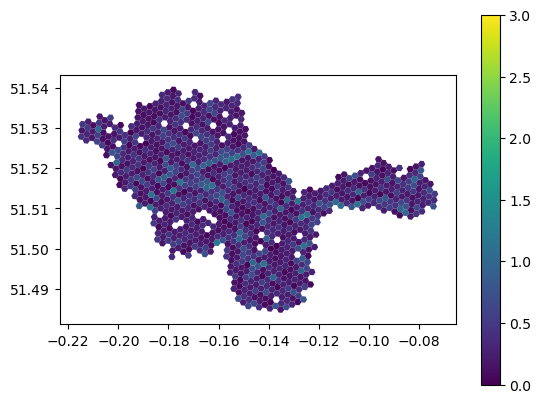

In [ ]:

hexgr = hexgr.to_crs("EPSG:4326")

hexgr.plot(column="mean", legend = True, vmax=3, vmin=0)

In [27]:
from branca.colormap import linear
hexgr_gd = GeoData(geo_dataframe = hexgr)
# print(hexgr_gd.data)
center = ( 51.51788, -0.07902 )
map = Map(center=center, zoom=12)
map.add(geo_data_area)
map.add(geo_data_west)

means_d = dict(zip(hexgr['grid_id'].tolist(), means))
print(hexgr_gd)
print(means_d)
layer = Choropleth(
    geo_data=hexgr_gd.data,
    choro_data=means_d,
    colormap=linear.YlOrRd_04,
    border_color='black',
    style={'fillOpacity': 0.8, 'dashArray': '5, 5'})
map.add(layer)
map.add(geo_data_mov)
display(map)

GeoData(data={'type': 'FeatureCollection', 'features': [{'id': '47', 'type': 'Feature', 'properties': {'grid_id': 47, 'grid_area': 26203.836283294942, 'index_right': 68906, 'AGG_DAY_PERIOD': '2020-03-23', 'LONLAT_ID': 172320, 'mean_column': 0.352038, 'XLON': -0.2135467529, 'XLAT': 51.527115441, '0': True, 'mean': 0.352038}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-0.21365127719417462, 51.526171940736404], [-0.2122176086210213, 51.52607618875434], [-0.21136781329802262, 51.52680278551417], [-0.21195169853761137, 51.52762514959378], [-0.21338541484857673, 51.52772090685674], [-0.21423519818075662, 51.52699429475905], [-0.21365127719417462, 51.526171940736404]]]}}, {'id': '48', 'type': 'Feature', 'properties': {'grid_id': 48, 'grid_area': 26203.836283293844, 'index_right': 38025, 'AGG_DAY_PERIOD': '2020-03-23', 'LONLAT_ID': 89927, 'mean_column': 0.454119, 'XLON': -0.2149200439, 'XLAT': 51.527115441, '0': True, 'mean': 0.454119}, 'geometry': {'type': 'Polygon', 'coordinates': [[[

KeyError: '47'

[0.456602,
 0.22036466666666665,
 0.184739,
 0.14972033333333334,
 0.0711255,
 0.23780500000000002,
 0.2193235,
 0.652644,
 0.3954245,
 0.11508833333333333,
 0.10706299999999999,
 0.23902499999999996,
 0.136465,
 0.050161,
 0.146631,
 0.94264,
 0.74155,
 0.9263254999999999,
 0.21447233333333335,
 0.182577,
 0.42898549999999996,
 0.13173433333333331,
 0.407075,
 0.24083633333333332,
 0.132696,
 0.016838,
 0.169163,
 0.169516,
 0.16517366666666666,
 0.167102,
 0.9290483333333334,
 0.5542475,
 1.2171444999999999,
 0.8411593333333333,
 0.1362995,
 0.2376965,
 0.85918475,
 0.138995,
 0.4289598333333333,
 0.24929833333333332,
 0.1217005,
 0.0659495,
 0.029509,
 0.5925385,
 0.143903,
 0.052748,
 0.22595866666666667,
 0.263613,
 0.4013196666666667,
 0.403445,
 0.7839615,
 1.382339,
 0.20454450000000002,
 0.48402266666666666,
 0.5978756666666666,
 0.2771175,
 0.672783,
 0.7430249999999999,
 0.4238815,
 0.073054,
 0.3164915,
 0.568782,
 0.6041393333333334,
 0.083488,
 0.252142,
 0.78275575,
 0.1

In [44]:
# Heatmap
import json
from shapely import wkt
import shapely

# City
array_mov = []
for point, row in movement_city_west.iterrows():
    array_point = json.loads(shapely.to_geojson(row.geometry))["coordinates"]
    ap = []
    ap.append(array_point[1])
    ap.append(array_point[0])
    ap.append(row.mean_column)
    array_mov.append(ap)

center = ( 51.51788, -0.07902 )
map = Map(center=center, zoom=12)
map.add(geo_data_area)
map.add(geo_data_west)

heatmap = Heatmap(
    locations=array_mov,
    radius=20
)

map.add(heatmap)

# Attractions

df_attractionsCity = pd.read_csv("attractionsCity.csv")
df_attractionsCity['geometry'] = df_attractionsCity['geometry'].apply(wkt.loads)
gdf_attractionsCity = gpd.GeoDataFrame(df_attractionsCity, crs='epsg:4326')


laenge=range(len(gdf_attractionsCity))
for x in laenge:
    poi = gdf_attractionsCity.iloc[x]
    marker2 = Marker(location=(poi.geometry.y , poi.geometry.x), draggable=False)
    pop = HTML()
    pop.value = poi[0]
    #pop.description = "Name:"
    marker2.popup = pop
    map.add(marker2)

df_attractionsWest = pd.read_csv("attractionsWest.csv")
df_attractionsWest['geometry'] = df_attractionsWest['geometry'].apply(wkt.loads)
gdf_attractionsWest = gpd.GeoDataFrame(df_attractionsWest, crs='epsg:4326')


laenge=range(len(df_attractionsWest))
for x in laenge:
    poi = df_attractionsWest.iloc[x]
    marker2 = Marker(location=(poi.geometry.y , poi.geometry.x), draggable=False)
    pop = HTML()
    pop.value = poi[0]
    #pop.description = "Name:"
    marker2.popup = pop
    map.add(marker2)

control = LayersControl(position='topright')
map.add(control)
display(map)

C:\Users\Anne\AppData\Local\Temp\ipykernel_18680\3437916827.py:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pop.value = poi[0]
C:\Users\Anne\AppData\Local\Temp\ipykernel_18680\3437916827.py:55: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pop.value = poi[0]


Map(center=[51.51788, -0.07902], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', '…

In [15]:
from shapely.geometry import Point
import geopandas as gpd
pnt1 = Point(-0.433273, 51.626116)
pnt2 = Point(0.668106, 51.672981)
points_df = gpd.GeoDataFrame({'geometry': [pnt1, pnt2]}, crs='EPSG:4326')
points_df = points_df.to_crs('EPSG:5234')
points_df2 = points_df.shift() #We shift the dataframe by 1 to align pnt1 with pnt2
print(points_df.distance(points_df2))

0            NaN
1    96551.90948
dtype: float64
